In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import os
import pickle
from classifier_objects import Airfoil



2024-03-07 15:51:17.848576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 15:51:17.913869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 15:51:17.913907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 15:51:17.916221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 15:51:17.926484: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 15:51:17.927991: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/100


2024-03-07 15:51:22.090903: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 15:51:22.091232: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1394/1394 - 5s - loss: 2.3975e-05 - mean_squared_error: 2.3975e-05 - val_loss: 1.4375e-05 - val_mean_squared_error: 1.4375e-05 - 5s/epoch - 4ms/step
Epoch 2/100
1394/1394 - 5s - loss: 7.8872e-06 - mean_squared_error: 7.8872e-06 - val_loss: 4.6414e-06 - val_mean_squared_error: 4.6414e-06 - 5s/epoch - 4ms/step
Epoch 3/100
1394/1394 - 4s - loss: 6.9168e-06 - mean_squared_error: 6.9168e-06 - val_loss: 4.7266e-06 - val_mean_squared_error: 4.7266e-06 - 4s/epoch - 3ms/step
Epoch 4/100
1394/1394 - 4s - loss: 5.9652e-06 - mean_squared_error: 5.9652e-06 - val_loss: 4.2431e-06 - val_mean_squared_error: 4.2431e-06 - 4s/epoch - 3ms/step
Epoch 5/100
1394/1394 - 4s - loss: 5.0549e-06 - mean_squared_error: 5.0549e-06 - val_loss: 4.9277e-06 - val_mean_squared_error: 4.9277e-06 - 4s/epoch - 3ms/step
Epoch 6/100
1394/1394 - 4s - loss: 5.2581e-06 - mean_squared_error: 5.2581e-06 - val_loss: 9.5015e-06 - val_mean_squared_error: 9.5015e-06 - 4s/epoch - 3ms/step
Epoch 7/100
1394/1394 - 4s - loss: 4.1738e-06 

MemoryError: Unable to allocate 14.5 GiB for an array with shape (44058, 44058) and data type float64

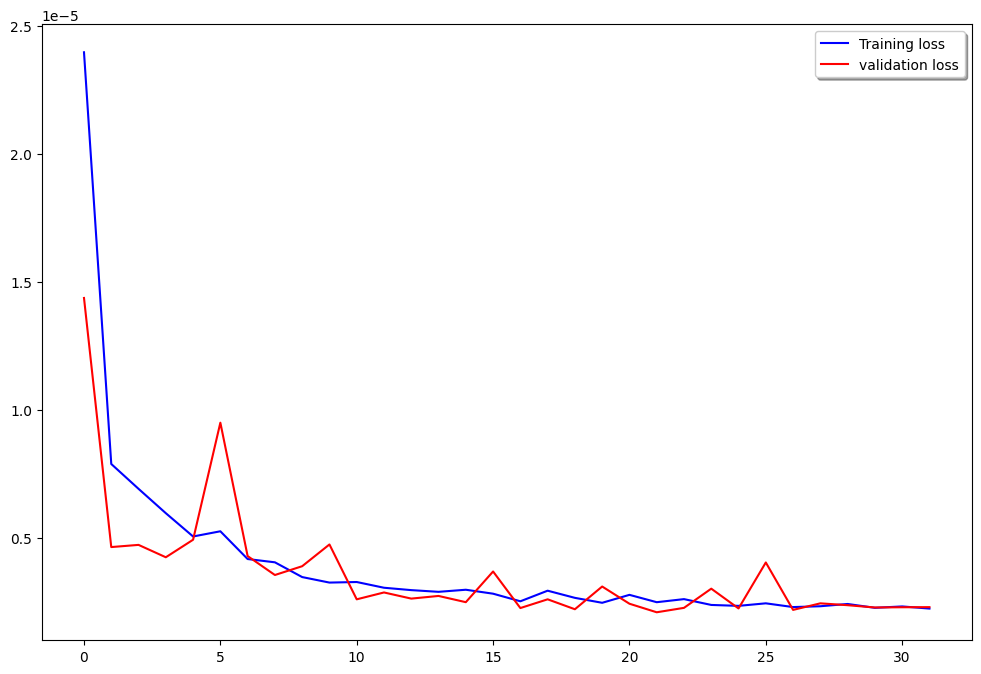

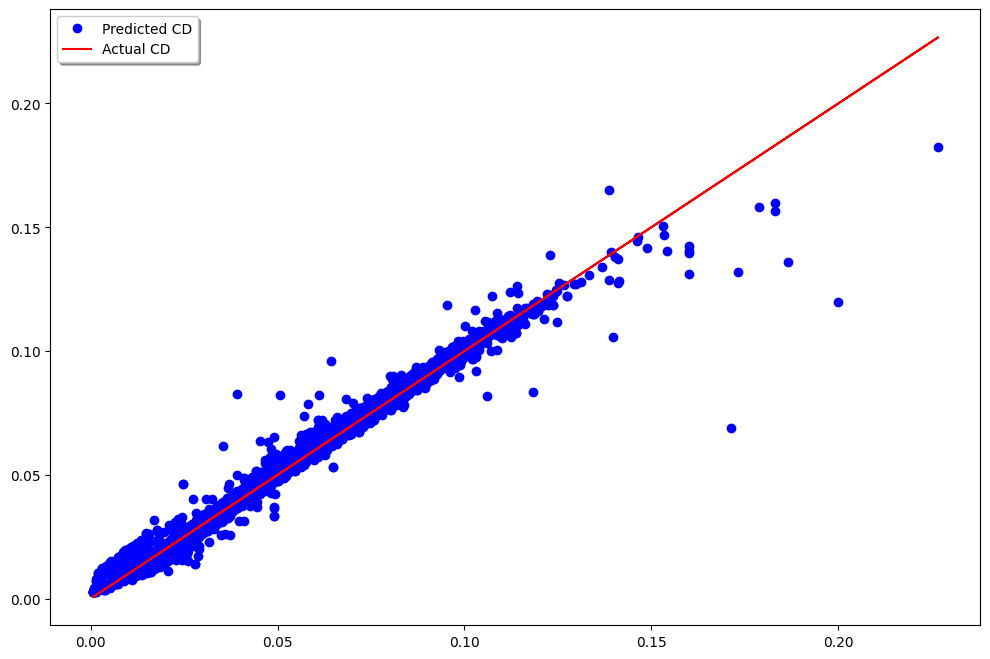

In [3]:
# Load dataset
x = np.loadtxt('input_data.txt')
DM = np.loadtxt('output_data.txt')

CD = DM[:,1]

x = x / np.amax(x, axis=0) # Normalize the data

# Split the dataset into training, validation and test sets
x_train, x_test, CD_train, CD_test = train_test_split(x, CD, test_size=0.1, random_state=42)
x_train, x_val, CD_train, CD_val = train_test_split(x_train, CD_train, test_size=0.1, random_state=42)

# Create the model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=5))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(x_train, CD_train, epochs=100, batch_size=256, validation_data=(x_val, CD_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
scores = model.evaluate(x_test, CD_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax.legend(loc='best', shadow=True)

# Predict the CD
CD_pred = model.predict(x_test)

# Plot the predicted CD vs the actual CD
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(CD_test, CD_pred, 'o', color='b', label="Predicted CD")
ax.plot(CD_test, CD_test, '-', color='r', label="Actual CD")
legend = ax.legend(loc='best', shadow=True)

# Calculate the R2 score
r2 = r2_score(CD_test, CD_pred)
print("R2 score: ", r2)

# Calculate the mean squared error
mse = np.mean((CD_test - CD_pred)**2)
print("Mean squared error: ", mse)


# model.save('MLP4regression_CL.h5')

In [ ]:
model.save('MLP4regression_CM.h5')

In [34]:
from sklearn import preprocessing
x = np.loadtxt('input_data.txt')
normalized_arr = preprocessing.normalize([x[100000,:]], norm='max')
print("-----x-------")
print(x[100000, :])
print("-----dammn x--------")
print(np.array([18, 500000, 6.0, 9.0, 40.0]) / np.amax(x, axis=0))
print("-----normal x--------")
x = x / np.amax(x, axis=0) # Normalize the data
print(x[100000, :])
print("------test x-------")
print(x_test[0:4, :])
print("------train x-------")
print(x_train[0:4, :])
CD_pred = model.predict(x_test[0:1, :])
print("------CDpredict-------")
print(CD_pred)
print("std of test x")
print(x[0:1,:].std(axis=0))

-----x-------
[-1.0e+00  9.0e+05  3.0e+00  0.0e+00  2.3e+01]
-----dammn x--------
[1.        0.5       1.        1.        0.8974359]
-----normal x--------
[-0.05555556  0.9         0.5         0.          0.58974359]
------test x-------
[[0.66666667 1.         0.         0.22222222 0.48717949]
 [0.77777778 1.         0.83333333 0.66666667 0.38461538]
 [0.05555556 0.5        0.16666667 0.33333333 0.8974359 ]
 [1.         1.         0.33333333 0.88888889 0.97435897]]
------train x-------
[[ 0.          0.6         1.          0.          0.48717949]
 [-0.11111111  0.9         0.66666667  0.88888889  0.43589744]
 [ 0.66666667  0.6         0.5         0.          0.64102564]
 [-0.27777778  0.7         0.83333333  0.77777778  0.66666667]]
1/1 [==============================] - 0s 13ms/step
------CDpredict-------
[[0.01672141]]
std of test x
[0. 0. 0. 0. 0.]
